## **Diabetes Prediction**

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/content/datasets_228_482_diabetes.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/content/datasets_228_482_diabetes.csv'

In [15]:
df.head(4)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0


In [16]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [17]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Some Parameters are zero and they cannot be zero such as (Glucose,BloodPressure,	SkinThickness,	Insulin,	BMI). Therefore we gonna replace 0 with respective mean values.

In [18]:
df['BMI']=df['BMI'].replace(0, df['BMI'].mean())
df['Insulin']=df['Insulin'].replace(0, df['Insulin'].mean())
df['Glucose']=df['Glucose'].replace(0, df['Glucose'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0, df['BloodPressure'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0, df['SkinThickness'].mean())


In [19]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [45]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<Axes: >

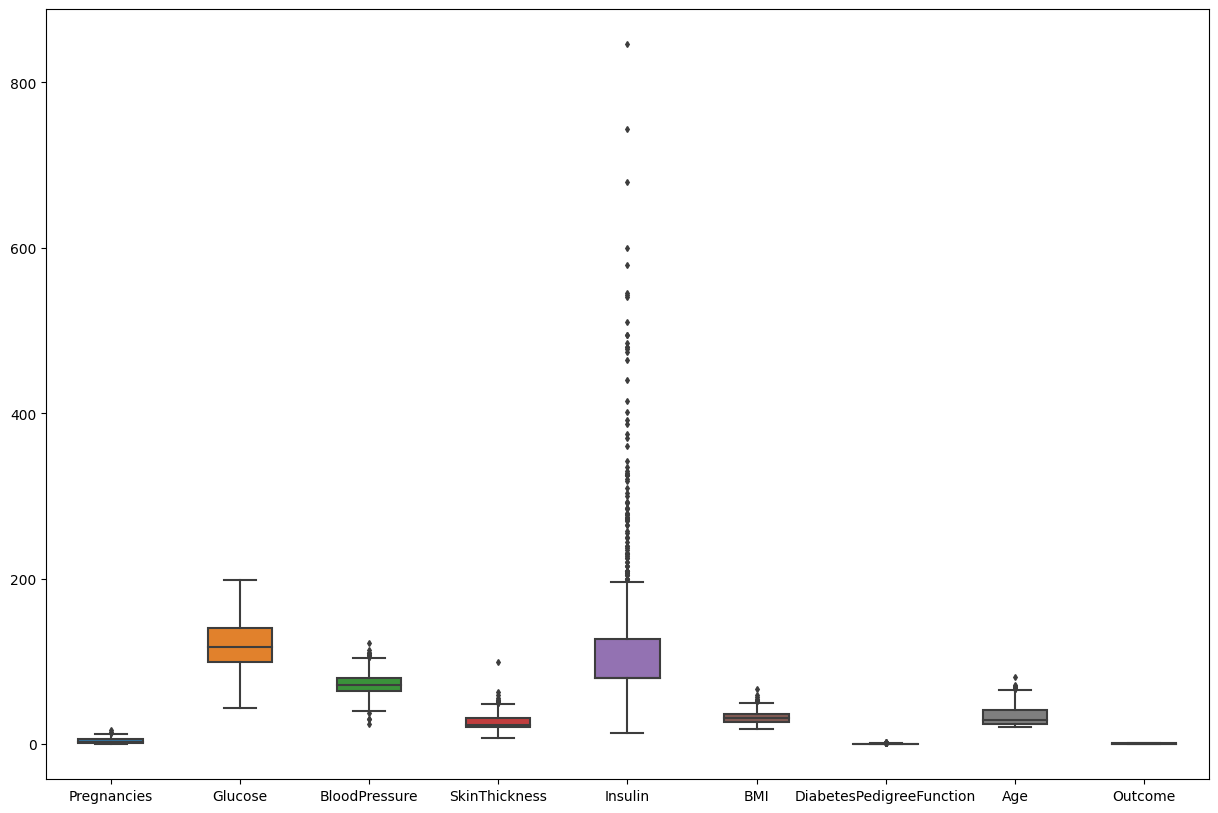

In [20]:
# Dealt with the 0 values and data look better. But, there still are outliers in some cols. Lets visualize it.
fig, ax =plt.subplots(figsize=(15,10))
sns.boxplot(data=df, width=0.5, ax=ax, fliersize=3)

In [22]:
X=df.drop(columns= ['Outcome'])
y=df['Outcome']

In [26]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.25, random_state=0)

In [30]:
import pickle
## standard scaling- Standardization
def scaler_standard(X_train, X_test):
  #scaling the data
  scaler= StandardScaler()
  X_train_sc=scaler.fit_transform(X_train)
  X_test_sc=scaler.transform(X_test)

  # saving the model
  file=open('/content/Model/standardScaler.pkl', 'wb')
  pickle.dump(scaler, file)
  file.close()

  return X_train_sc, X_test_sc

In [34]:
X_train_sc, X_test_sc=scaler_standard(X_train, X_test)

In [36]:
Regression=LogisticRegression()

In [37]:
# HYperparameter Tuning
# GridsearchCV
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
# Parameter grid
parameters={
    'penalty': ['l1', 'l2'],
    'C'      : np.logspace(-3,3,7),
    'solver' : ['newton-cg', 'lbfgs', 'liblinear']

}

In [39]:
clf=GridSearchCV(Regression,           # model
     param_grid=parameters,            # hyperparameters
     scoring='accuracy',               # metric for scoring
     cv=10)                            # number of folds

clf.fit(X_train_sc, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [40]:
clf.best_params_

{'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}

let's see how well our model performs on the test data set

In [41]:
clf.best_score_

0.763793103448276

In [42]:
y_pred=clf.predict(X_test_sc)

accuracy=accuracy_score(y_test, y_pred)

In [43]:
conf_mat= confusion_matrix(y_test, y_pred)
conf_mat

array([[117,  13],
       [ 26,  36]])

In [52]:
y_test.value_counts()

0    130
1     62
Name: Outcome, dtype: int64

In [46]:
true_positive=conf_mat[0][0]
false_positive=conf_mat[0][1]
false_negative=conf_mat[1][0]
true_negative=conf_mat[1][1]

In [48]:
Accuracy= (true_positive + true_negative)/(true_positive + true_negative+ false_positive + false_negative)
Accuracy

0.796875

In [49]:
Precision=true_positive/(true_positive + false_positive)
Precision

0.9

In [54]:
Recall= true_positive/(true_positive +false_negative)
Recall

0.8181818181818182

In [56]:
F1_score=2 * Precision * Recall/ (Precision + Recall)
F1_score

0.8571428571428572

In [58]:
import pickle
file=open('/content/Model/LR_CV_Grid.pkl', 'wb')
pickle.dump(clf, file)
file.close()